In [1]:
from keras.models import load_model
import os
import json
import numpy as np
import pandas as pd
from common_processing import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
test_model = load_model('./Checkpoints/Weight/fruit_classify_3l_resnet.h5')

In [4]:
#Generate test data
X_data = []
y_true = []
count = 0
all_path = './new_data/20200413/'
for folder in os.listdir(all_path):
    if '.' not in folder:
        lbl = count
        fld_path = all_path + folder + '/'
        for dirr in os.listdir(fld_path):
            if '_i.csv' in dirr:
                print(fld_path + dirr)
                df = pd.read_csv(fld_path + dirr)
                if len(df.columns) > 2:
                    df = df.loc[:, df.columns.intersection(['Wavelength (nm)', 'Sample Signal (unitless)'])]
                try:
                    dfnp = df.to_numpy()[:, 1]
                    X_data.append(preprocess_spectrum(dfnp))
#                     X_data.append(np.expand_dims(input_norm(calc_deriative(dfnp)), 1))
                    y_true.append(folder)
                except IndexError:
                    print(df)
#                     raise Exception
        count += 1
X_data = np.array(X_data)
y_true = np.array(y_true)

./new_data/20200413/Apple/Column 1_020024_20200413_102221_i.csv
./new_data/20200413/Apple/Column 1_020025_20200413_102233_i.csv
./new_data/20200413/Apple/Column 1_020026_20200413_102335_i.csv
./new_data/20200413/Apple/Column 1_020027_20200413_102349_i.csv
./new_data/20200413/Apple/Column 1_020028_20200413_102423_i.csv
./new_data/20200413/Apple/Column 1_020029_20200413_102532_i.csv
./new_data/20200413/Apple/Column 1_020030_20200413_102544_i.csv
./new_data/20200413/Apple/Column 1_020031_20200413_102557_i.csv
./new_data/20200413/Apple/Column 1_020034_20200413_102641_i.csv
./new_data/20200413/Apple/Column 1_028030_20200413_110309_i.csv
./new_data/20200413/Apple/Column 1_020032_20200413_102616_i.csv
./new_data/20200413/Apple/Column 1_020033_20200413_102628_i.csv
./new_data/20200413/Apple/Column 1_020035_20200413_102727_i.csv
./new_data/20200413/Apple/Column 1_020036_20200413_102738_i.csv
./new_data/20200413/Apple/Column 1_020037_20200413_102749_i.csv
./new_data/20200413/Apple/Column 1_02003

./new_data/20200413/DragonFruit/Column 1_018004_20200413_100741_i.csv
./new_data/20200413/DragonFruit/Column 1_018005_20200413_100753_i.csv
./new_data/20200413/DragonFruit/Column 1_019001_20200413_100838_i.csv
./new_data/20200413/DragonFruit/Column 1_019002_20200413_100901_i.csv
./new_data/20200413/DragonFruit/Column 1_019003_20200413_100914_i.csv
./new_data/20200413/DragonFruit/Column 1_019006_20200413_101005_i.csv
./new_data/20200413/DragonFruit/Column 1_027003_20200413_104735_i.csv
./new_data/20200413/DragonFruit/Column 1_019004_20200413_100927_i.csv
./new_data/20200413/DragonFruit/Column 1_019005_20200413_100951_i.csv
./new_data/20200413/DragonFruit/Column 1_019007_20200413_101028_i.csv
./new_data/20200413/DragonFruit/Column 1_019008_20200413_101038_i.csv
./new_data/20200413/DragonFruit/Column 1_019009_20200413_101051_i.csv
./new_data/20200413/DragonFruit/Column 1_019010_20200413_101104_i.csv
./new_data/20200413/DragonFruit/Column 1_019011_20200413_101118_i.csv
./new_data/20200413/

./new_data/20200413/Guava/Column 1_275091_20200413_092740_i.csv
./new_data/20200413/Guava/Column 1_275092_20200413_092750_i.csv
./new_data/20200413/Guava/Column 1_275094_20200413_092829_i.csv
./new_data/20200413/Guava/Column 1_275095_20200413_092847_i.csv
./new_data/20200413/Guava/Column 1_275096_20200413_092901_i.csv
./new_data/20200413/Mango/Column 1_020001_20200413_101526_i.csv
./new_data/20200413/Mango/Column 1_020002_20200413_101541_i.csv
./new_data/20200413/Mango/Column 1_020004_20200413_101611_i.csv
./new_data/20200413/Mango/Column 1_020005_20200413_101624_i.csv
./new_data/20200413/Mango/Column 1_020006_20200413_101637_i.csv
./new_data/20200413/Mango/Column 1_020007_20200413_101649_i.csv
./new_data/20200413/Mango/Column 1_020008_20200413_101701_i.csv
./new_data/20200413/Mango/Column 1_020009_20200413_101715_i.csv
./new_data/20200413/Mango/Column 1_020012_20200413_101754_i.csv
./new_data/20200413/Mango/Column 1_028008_20200413_105537_i.csv
./new_data/20200413/Mango/Column 1_02001

In [5]:
temp = np.load('./new_data/testing4days.npz')
X_data = temp['xdata']
y_true = temp['ytrue']
preprocess_data = []
for x in X_data:
    preprocess_data.append(preprocess_spectrum(x))
X_data = np.array(preprocess_data)

In [5]:
# y_true

In [6]:
print(X_data.shape)
print(y_true.shape)

(330, 224, 3)
(330,)


In [7]:
with open('./label_dict.json', 'r') as label_dict_file:
    label_dict = json.loads(label_dict_file.read())
print(label_dict)

['Apple', 'Avocado', 'DragonFruit', 'Guava', 'Mango']


In [8]:
y_pred = test_model.predict(X_data)

In [9]:
y_pred = [label_dict[np.argmax(pred)] for pred in y_pred]

In [10]:
total_prediction = 0
total_correct = 0
for pred, label in zip(y_pred, y_true):
    total_prediction += 1
    if pred == label:
        total_correct += 1
    else:
        print('True: {} but predict: {}'.format(label, pred))
print('Test accuracy: {0:.2f}'.format(total_correct * 100/total_prediction))

True: Apple but predict: Avocado
True: Apple but predict: Mango
True: Apple but predict: Mango
True: Apple but predict: Guava
True: Apple but predict: Guava
True: Apple but predict: Guava
True: Apple but predict: Avocado
True: Apple but predict: Mango
True: Apple but predict: Mango
True: Avocado but predict: Mango
True: Avocado but predict: DragonFruit
True: Avocado but predict: Mango
True: Avocado but predict: DragonFruit
True: Avocado but predict: Mango
True: Avocado but predict: Mango
True: Avocado but predict: DragonFruit
True: Avocado but predict: Mango
True: Avocado but predict: Mango
True: Avocado but predict: Mango
True: Avocado but predict: Mango
True: Avocado but predict: Mango
True: DragonFruit but predict: Guava
True: DragonFruit but predict: Guava
True: DragonFruit but predict: Avocado
True: DragonFruit but predict: Mango
True: DragonFruit but predict: Avocado
True: DragonFruit but predict: Avocado
True: DragonFruit but predict: Mango
True: DragonFruit but predict: Mango
T

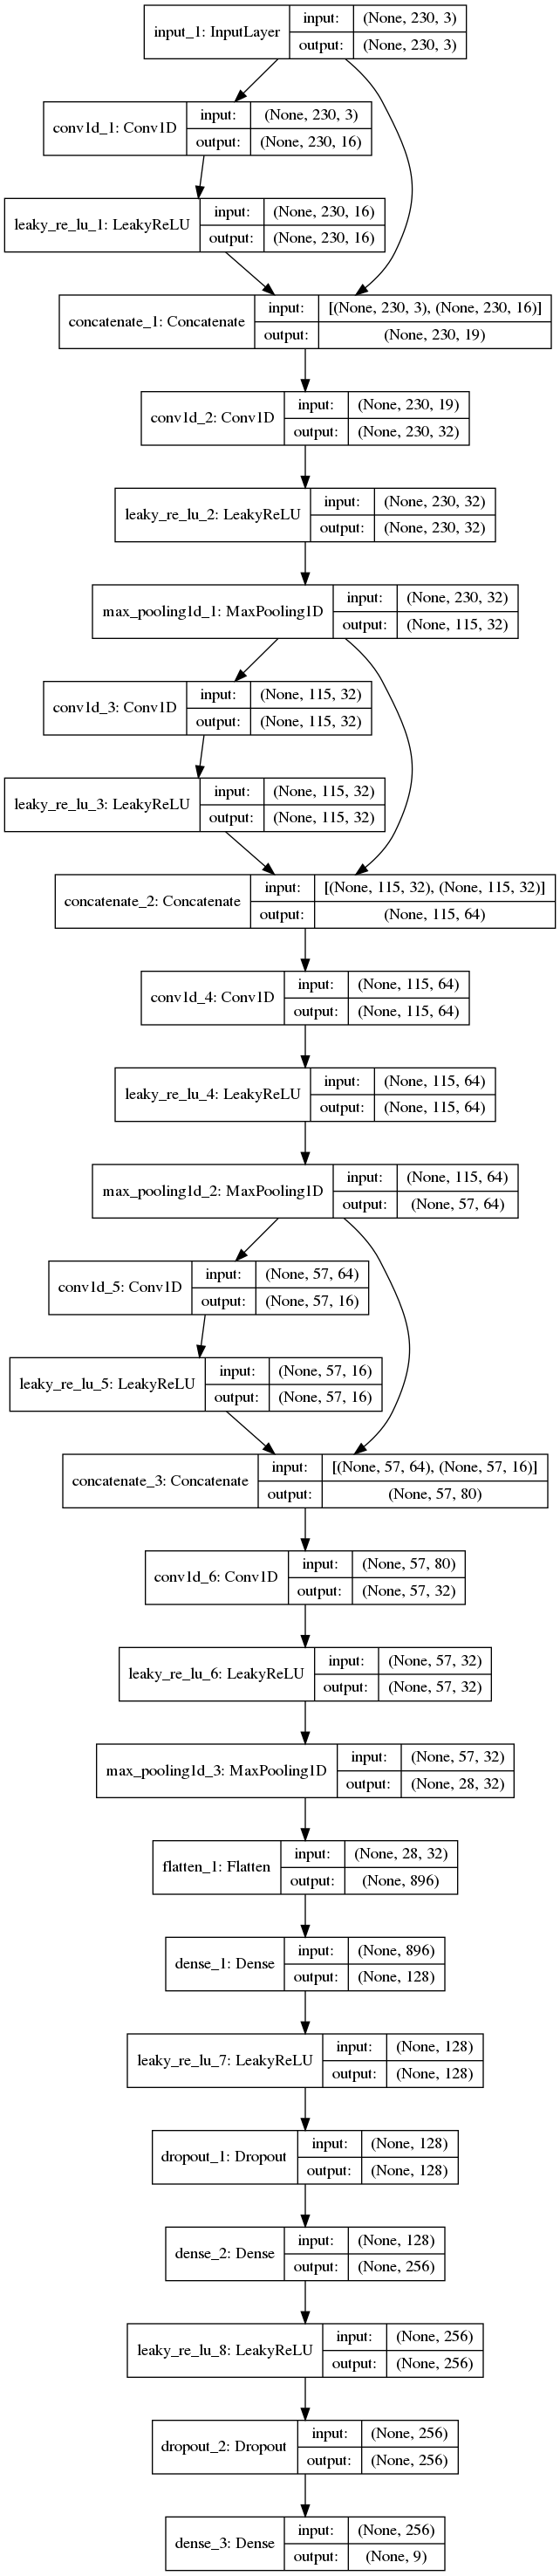

In [11]:
from keras.utils import plot_model
plot_model(test_model, to_file='./Checkpoints/fruit_classify_der_resnet.png', show_shapes=True)

[[41  0  0  0  0]
 [ 8 42  0  0  9]
 [ 3  4 61 12  0]
 [ 9  1  2 52  0]
 [ 5 19  3  2 57]]


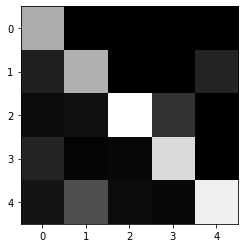

In [12]:
plt.imshow(confusion_matrix(y_pred, y_true), 'gray')
print(confusion_matrix(y_pred, y_true))

In [13]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

       Apple       0.62      1.00      0.77        41
     Avocado       0.64      0.71      0.67        59
 DragonFruit       0.92      0.76      0.84        80
       Guava       0.79      0.81      0.80        64
       Mango       0.86      0.66      0.75        86

    accuracy                           0.77       330
   macro avg       0.77      0.79      0.76       330
weighted avg       0.79      0.77      0.77       330

